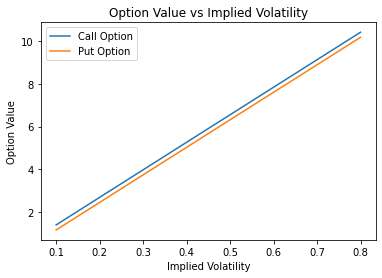

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Option parameters
S = 165.0
K = 165.0
T = 14 / 365.0
r = 0.0425
q = 0.0053

# Range of implied volatilities
sigma_range = np.arange(0.1, 0.81, 0.01)

# Black-Scholes option pricing formula
def black_scholes(S, K, T, r, q, sigma, option='call'):
    d1 = (np.log(S/K) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option == 'call':
        value = S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:
        value = K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-q * T) * norm.cdf(-d1)
    return value

# Calculate option values for a range of implied volatilities
call_values = []
put_values = []
for sigma in sigma_range:
    call_value = black_scholes(S, K, T, r, q, sigma, 'call')
    put_value = black_scholes(S, K, T, r, q, sigma, 'put')
    call_values.append(call_value)
    put_values.append(put_value)

# Plot the option values vs. implied volatilities
plt.plot(sigma_range, call_values, label='Call Option')
plt.plot(sigma_range, put_values, label='Put Option')
plt.xlabel('Implied Volatility')
plt.ylabel('Option Value')
plt.title('Option Value vs Implied Volatility')
plt.legend()
plt.show()
